In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as psx
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder

In [2]:
data = pd.read_csv("Data/Loan_Dataset.csv")

In [3]:
dt = data.copy()

In [4]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
#Encoding Categorical Features with null values for KNNimputer
categorical = data.iloc[:,[1,2,3,5]]
encode = OrdinalEncoder()
fit = encode.fit_transform(categorical)
encode_df = pd.DataFrame(fit,columns=encode.get_feature_names_out(categorical.columns))

In [8]:
encode_df

,Gender,Married,Dependents,Self_Employed
0,1.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.0
2,1.0,1.0,0.0,1.0
3,1.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
609,0.0,0.0,0.0,0.0
610,1.0,1.0,3.0,0.0
611,1.0,1.0,1.0,0.0
612,1.0,1.0,2.0,0.0


In [9]:
#KNNImputer
impute =  KNNImputer()# neighbors = 5
data_imputer = impute.fit_transform(encode_df)
df = pd.DataFrame(data_imputer,columns=["Gender","Married","Dependents","Self_Employed"])
df

,Gender,Married,Dependents,Self_Employed
0,1.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.0
2,1.0,1.0,0.0,1.0
3,1.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
609,0.0,0.0,0.0,0.0
610,1.0,1.0,3.0,0.0
611,1.0,1.0,1.0,0.0
612,1.0,1.0,2.0,0.0


In [39]:
new_data = pd.concat([df.astype("int"),data.drop(columns=["Gender","Married","Dependents","Self_Employed"])],axis=1)

In [28]:
new_data

,Gender,Married,Dependents,Self_Employed,Loan_ID,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,LP001002,Graduate,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1,1,1,0,LP001003,Graduate,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1,1,0,1,LP001005,Graduate,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1,1,0,0,LP001006,Not Graduate,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1,0,0,0,LP001008,Graduate,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,LP002978,Graduate,2900,0.0,71.0,360.0,1.0,Rural,Y
610,1,1,3,0,LP002979,Graduate,4106,0.0,40.0,180.0,1.0,Rural,Y
611,1,1,1,0,LP002983,Graduate,8072,240.0,253.0,360.0,1.0,Urban,Y
612,1,1,2,0,LP002984,Graduate,7583,0.0,187.0,360.0,1.0,Urban,Y


In [12]:
new_data.isnull().sum()

Gender                0
Married               0
Dependents            0
Self_Employed         0
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
numerical = data.loc[:,["LoanAmount","Loan_Amount_Term","Credit_History"]]

In [14]:
#KNNimputer for fillin missing values 
knn = KNNImputer(n_neighbors=6)
knn_ = knn.fit_transform(numerical)
knn_df = pd.DataFrame(knn_,columns=knn.get_feature_names_out(numerical.columns))
knn_df

,LoanAmount,Loan_Amount_Term,Credit_History
0,136.166667,360.0,1.0
1,128.000000,360.0,1.0
2,66.000000,360.0,1.0
3,120.000000,360.0,1.0
4,141.000000,360.0,1.0
...,...,...,...
609,71.000000,360.0,1.0
610,40.000000,180.0,1.0
611,253.000000,360.0,1.0
612,187.000000,360.0,1.0


In [40]:
new_data = pd.concat([new_data.iloc[:,[4]],new_data.drop(columns=["Loan_ID","LoanAmount","Loan_Amount_Term","Credit_History","Loan_Status"]).iloc[:,0:9],knn_df,new_data.iloc[:,[12]]],axis=1)

In [41]:
int_data = new_data.loc[:,["LoanAmount","Loan_Amount_Term","Credit_History","CoapplicantIncome"]].astype("int")

In [42]:
# to Int datatype
new_data = pd.concat([new_data.iloc[:,[0,1,2,3,4,5,6,8]],int_data,new_data.iloc[:,[12]]],axis=1)

In [43]:
new_data

,Loan_ID,Gender,Married,Dependents,Self_Employed,Education,ApplicantIncome,Property_Area,LoanAmount,Loan_Amount_Term,Credit_History,CoapplicantIncome,Loan_Status
0,LP001002,1,0,0,0,Graduate,5849,Urban,136,360,1,0,Y
1,LP001003,1,1,1,0,Graduate,4583,Rural,128,360,1,1508,N
2,LP001005,1,1,0,1,Graduate,3000,Urban,66,360,1,0,Y
3,LP001006,1,1,0,0,Not Graduate,2583,Urban,120,360,1,2358,Y
4,LP001008,1,0,0,0,Graduate,6000,Urban,141,360,1,0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,Graduate,2900,Rural,71,360,1,0,Y
610,LP002979,1,1,3,0,Graduate,4106,Rural,40,180,1,0,Y
611,LP002983,1,1,1,0,Graduate,8072,Urban,253,360,1,240,Y
612,LP002984,1,1,2,0,Graduate,7583,Urban,187,360,1,0,Y


In [46]:
new_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Self_Employed        0
Education            0
ApplicantIncome      0
Property_Area        0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
CoapplicantIncome    0
Loan_Status          0
dtype: int64

In [45]:
new_data.corr(numeric_only = True)

,Gender,Married,Dependents,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,CoapplicantIncome
Gender,1.000000,0.376324,0.171455,-0.018446,0.053990,0.101745,-0.066909,0.006890,0.088416
Married,0.376324,1.000000,0.348656,0.008491,0.050194,0.144917,-0.104629,-0.042442,0.080496
Dependents,0.171455,0.348656,1.000000,0.053122,0.118879,0.161982,-0.097622,-0.015493,0.031150
Self_Employed,-0.018446,0.008491,0.053122,1.000000,0.127180,0.115257,-0.032085,-0.001208,-0.016100
ApplicantIncome,0.053990,0.050194,0.118879,0.127180,1.000000,0.565719,-0.045287,0.012532,-0.116604
LoanAmount,0.101745,0.144917,0.161982,0.115257,0.565719,1.000000,0.039327,-0.002731,0.188752
Loan_Amount_Term,-0.066909,-0.104629,-0.097622,-0.032085,-0.045287,0.039327,1.000000,0.002119,-0.062118
Credit_History,0.006890,-0.042442,-0.015493,-0.001208,0.012532,-0.002731,0.002119,1.000000,-0.010286
CoapplicantIncome,0.088416,0.080496,0.031150,-0.016100,-0.116604,0.188752,-0.062118,-0.010286,1.000000


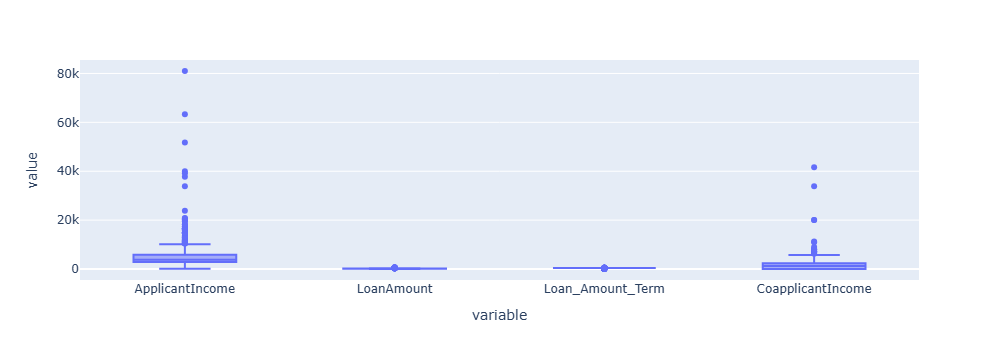

<Figure size 1000x1000 with 0 Axes>

In [50]:
#Outliers Detection
fig = plt.figure(figsize=(10,10))
fig = psx.box(new_data.iloc[:,[6,8,9,11]])
fig.show()

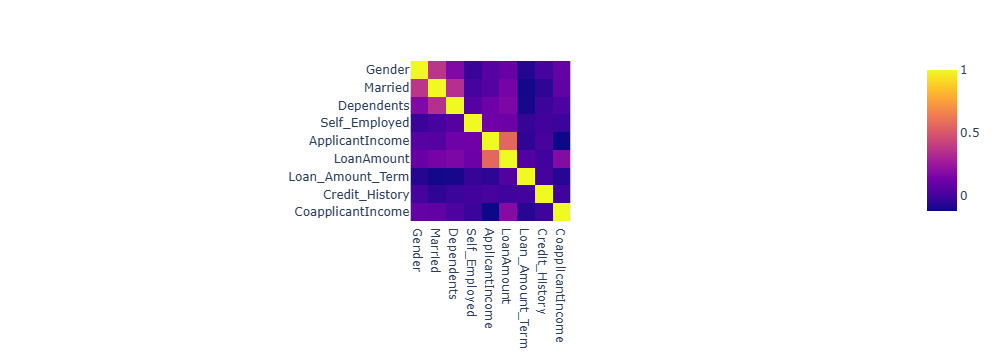

<Figure size 500x1000 with 0 Axes>

In [58]:
fig = plt.figure(figsize=(5,10))
fig = psx.imshow(new_data.corr(numeric_only=True))
fig.show()

In [49]:
new_data["ApplicantIncome"].values

array([ 5849,  4583,  3000,  2583,  6000,  5417,  2333,  3036,  4006,
       12841,  3200,  2500,  3073,  1853,  1299,  4950,  3596,  3510,
        4887,  2600,  7660,  5955,  2600,  3365,  3717,  9560,  2799,
        4226,  1442,  3750,  4166,  3167,  4692,  3500, 12500,  2275,
        1828,  3667,  4166,  3748,  3600,  1800,  2400,  3941,  4695,
        3410,  5649,  5821,  2645,  4000,  1928,  3086,  4230,  4616,
       11500,  2708,  2132,  3366,  8080,  3357,  2500,  3029,  2609,
        4945,  4166,  5726,  3200, 10750,  7100,  4300,  3208,  1875,
        3500,  4755,  5266,  3750,  3750,  1000,  3167,  3333,  3846,
        2395,  1378,  6000,  3988,  2366,  3333,  2500,  8566,  5695,
        2958,  6250,  3273,  4133,  3620,  6782,  2484,  1977,  4188,
        1759,  4288,  4843, 13650,  4652,  3816,  3052, 11417,  7333,
        3800,  2071,  5316,  2929,  3572,  7451,  5050, 14583,  3167,
        2214,  5568, 10408,  5667,  4166,  2137,  2957,  4300,  3692,
       23803,  3865,

In [60]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Loan_ID            614 non-null    object
 1   Gender             614 non-null    int64 
 2   Married            614 non-null    int64 
 3   Dependents         614 non-null    int64 
 4   Self_Employed      614 non-null    int64 
 5   Education          614 non-null    object
 6   ApplicantIncome    614 non-null    int64 
 7   Property_Area      614 non-null    object
 8   LoanAmount         614 non-null    int64 
 9   Loan_Amount_Term   614 non-null    int64 
 10  Credit_History     614 non-null    int64 
 11  CoapplicantIncome  614 non-null    int64 
 12  Loan_Status        614 non-null    object
dtypes: int64(9), object(4)
memory usage: 62.5+ KB


<h1><b>Final Report: Data Validation</b></h1>
<li>
    Missing Values in Features: "Gender","Married","Dependence","Self_Employed" of type OBJ.Encoding techniques like Ordinal Encoder Used to Perform KNNImputer to fill in missing values.<br>
    Missing Values in Features: "LoanAmount","Loan_Amount_Term","Credit_History" of type Float.KNNImputer is used for impute missing values
</li>
<li>
    Converted Datatype Float to Int For Numerical Features Like  "LoanAmount","Loan_Amount_Term","Credit_History","CoapplicantIncome"
</li>
<li>
    Outliers Detected in Features "ApplicantIncome" and "CoapplicantIncome" But it makes sense in terms of real-case scenarios.
</li>
<li>
    No Dependencies Among Features
</li>